In [1]:
#Insertamos librerias
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Abrimos el fits de las estrellas
star_1b = fits.open('Star1_B.fits')[0]
star_1v = fits.open('Star1_V.fits')[0]
star_2b = fits.open('Star2_B.fits')[0]
star_2v = fits.open('Star2_V.fits')[0]
#data y header
data = star_1b.data
header = star_1b.header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{da52125b-74f6-49

In [3]:
#Threshold, para cada estrella
threshold_1b = detect_threshold(star_1b.data, nsigma = 5)
threshold_1v = detect_threshold(star_1v.data, nsigma = 5)
threshold_2b = detect_threshold(star_2b.data, nsigma = 5)
threshold_2v = detect_threshold(star_2v.data, nsigma = 5)
#Detectamos fuentes
sour_1b = detect_sources(star_1b.data, threshold_1b, npixels=50)
sour_1v = detect_sources(star_1v.data, threshold_1v, npixels=50)
sour_2b = detect_sources(star_2b.data, threshold_2b, npixels=50)
sour_2v = detect_sources(star_2v.data, threshold_2v, npixels=50)

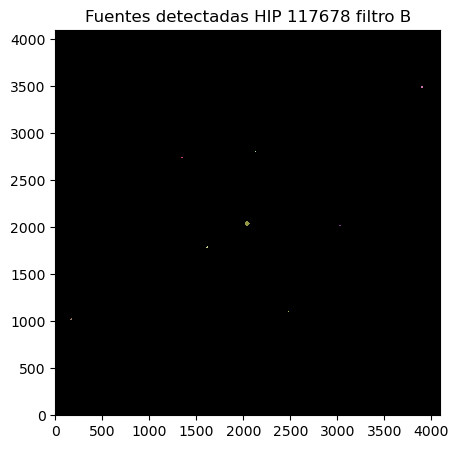

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9
labels: [1 2 3 4 5 6 7 8 9]


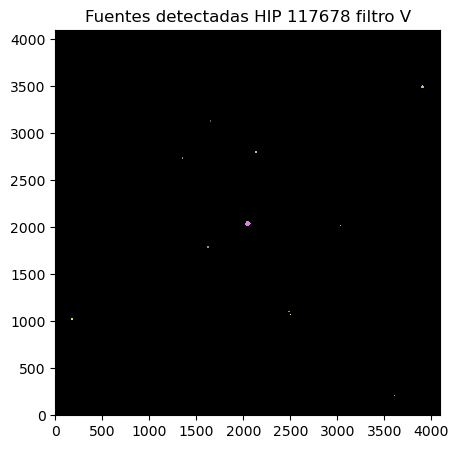

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


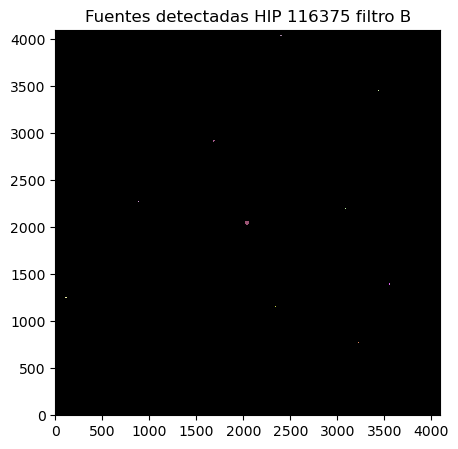

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]


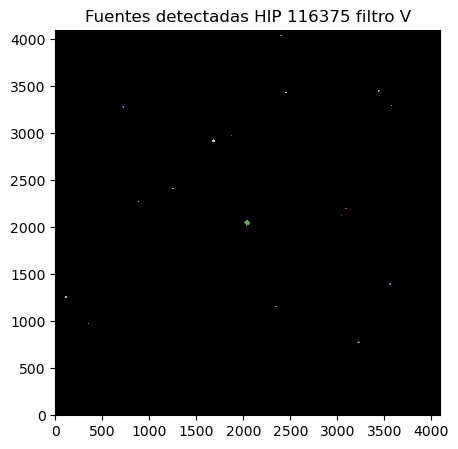

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 21
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [4]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour_1b = sour_1b.make_cmap(seed=123)
cmap_sour_1v = sour_1v.make_cmap(seed=123)
cmap_sour_2b = sour_2b.make_cmap(seed=123)
cmap_sour_2v = sour_2v.make_cmap(seed=123)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1b, origin='lower', cmap=cmap_sour_1b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 117678 filtro B')
plt.show()
print(sour_1b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1v, origin='lower', cmap=cmap_sour_1v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 117678 filtro V')
plt.show()
print(sour_1v)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2b, origin='lower', cmap=cmap_sour_2b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 116375 filtro B')
plt.show()
print(sour_2b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2v, origin='lower', cmap=cmap_sour_2v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 116375 filtro V')
plt.show()
print(sour_2v)

In [5]:
#Obtenemos el catálogo de la primera
cat_1b = SourceCatalog(data, sour_1b)
#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1b

C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\gwcs\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,173.51527658077447,1019.5443952589342,None,162,185,1011,1027,279.0,4.746332443482012,3.0262851529014543,3.9873267557978647,0.7703634874905667,12.934150695800781,151.54617309570312,0.0,14531.548810958862,nan,15759.900194258247,nan
2,2483.2944812767028,1103.7145243858217,None,2476,2491,1099,1108,79.0,3.5021563619138565,1.8110603312083855,15.233064982968122,0.855908554555109,12.817936897277832,33.24496078491211,0.0,1518.4575214385986,nan,2695.932129957321,nan
3,1619.9680653571838,1785.1295528612789,None,1608,1631,1777,1793,266.0,4.80404054349447,2.904483312068095,8.294062169034742,0.7965355030220986,12.862831115722656,134.67259216308594,0.0,11927.562517166138,nan,13081.60444938755,nan
4,2042.702219264836,2035.7102966120606,None,2013,2073,2008,2061,2031.0,6.372058094581735,4.814278064286752,8.442347989008113,0.6551145912348075,12.812538146972656,10065.8046875,0.0,1226580.176059723,nan,1204658.2467368492,nan
5,3031.7877040802905,2013.0544693603904,None,3025,3040,2008,2017,118.0,3.807892684628925,2.131857443770951,11.68494798160281,0.8285924282448132,13.012175559997559,50.38507080078125,0.0,2883.472514152527,nan,3881.7443993398947,nan
6,1351.3324895973074,2735.7311765399295,None,1341,1361,2729,2741,179.0,4.369653614620882,2.402349965776745,9.11531435134279,0.8353092231448161,12.967459678649902,90.57382202148438,0.0,6474.532746315002,nan,7468.870737042602,nan
7,2130.502869281509,2798.1782668892083,None,2121,2140,2792,2804,175.0,4.3342277403870435,2.4039309603656767,7.31980751316787,0.8320912084246354,13.033111572265625,79.30342102050781,0.0,5961.453644752502,nan,7052.743966242031,nan
8,1649.1545798550997,3127.393920704089,None,1640,1657,3122,3132,126.0,3.9201384526377003,2.1140080808798207,6.127641320418721,0.8421337411104663,12.901444435119629,59.66657257080078,0.0,3519.4894523620605,nan,4509.532210519792,nan


In [6]:
#Catalogo de las 4
# Catálogo para HIP117678 
cat_1b = SourceCatalog(star_1b.data, sour_1b)
cat_1v = SourceCatalog(star_1v.data, sour_1v)
# Catálogo para HIP116375  
cat_2b = SourceCatalog(star_2b.data, sour_2b)
cat_2v = SourceCatalog(star_2v.data, sour_2v)

#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1v = cat_1v.to_table()
tbl_2b = cat_2b.to_table()
tbl_2v = cat_2v.to_table()

print(tbl_1b)
print(tbl_1v)
print(tbl_2b)
print(tbl_2v)

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1 173.51527658077447 1019.5443952589342 ... 15759.900194258247          nan
    2 2483.2944812767028 1103.7145243858217 ...  2695.932129957321          nan
    3 1619.9680653571838 1785.1295528612789 ...  13081.60444938755          nan
    4  2042.702219264836 2035.7102966120606 ... 1204658.2467368492          nan
    5 3031.7877040802905 2013.0544693603904 ... 3881.7443993398947          nan
    6 1351.3324895973074 2735.7311765399295 ...  7468.870737042602          nan
    7  2130.502869281509 2798.1782668892083 ...  7052.743966242031          nan
    8 1649.1545798550997  3127.393920704089 ...  4509.532210519792          nan
    9 3905.5195094534324  3489.666803636216 ... 55271.228409137635          nan
label     xcentroid          ycentroid  

In [7]:
# Ahora extraemos las columnas
tabla_1b = tbl_1b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_1v = tbl_1v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2b = tbl_2b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2v = tbl_2v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1 173.51527658077447 1019.5443952589342  279.0 14531.548810958862
    2 2483.2944812767028 1103.7145243858217   79.0 1518.4575214385986
    3 1619.9680653571838 1785.1295528612789  266.0 11927.562517166138
    4  2042.702219264836 2035.7102966120606 2031.0  1226580.176059723
    5 3031.7877040802905 2013.0544693603904  118.0  2883.472514152527
    6 1351.3324895973074 2735.7311765399295  179.0  6474.532746315002
    7  2130.502869281509 2798.1782668892083  175.0  5961.453644752502
    8 1649.1545798550997  3127.393920704089  126.0 3519.4894523620605
    9 3905.5195094534324  3489.666803636216  460.0 54003.546038627625
label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- --------------

In [8]:
#obtenemos flujo real
tabla_1b['segment_flux'] = tabla_1b['segment_flux']/header['EXPTIME']
tabla_1v['segment_flux'] = tabla_1v['segment_flux']/header['EXPTIME']
tabla_2b['segment_flux'] = tabla_2b['segment_flux']/header['EXPTIME']
tabla_2v['segment_flux'] = tabla_2v['segment_flux']/header['EXPTIME']
#mostamos
print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1 173.51527658077447 1019.5443952589342  279.0 2906.3097621917723
    2 2483.2944812767028 1103.7145243858217   79.0 303.69150428771974
    3 1619.9680653571838 1785.1295528612789  266.0 2385.5125034332277
    4  2042.702219264836 2035.7102966120606 2031.0 245316.03521194457
    5 3031.7877040802905 2013.0544693603904  118.0  576.6945028305054
    6 1351.3324895973074 2735.7311765399295  179.0 1294.9065492630004
    7  2130.502869281509 2798.1782668892083  175.0 1192.2907289505006
    8 1649.1545798550997  3127.393920704089  126.0  703.8978904724121
    9 3905.5195094534324  3489.666803636216  460.0 10800.709207725526
label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- --------------

In [9]:
#Buscamos la fuente que es la estrella (mayor área)
star_1b_index = np.argmax(tabla_1b['area']) 
star_1v_index = np.argmax(tabla_1v['area']) 
star_2b_index = np.argmax(tabla_2b['area']) 
star_2v_index = np.argmax(tabla_2v['area'])

#Obtenemos flujo
flux_star_1b = tabla_1b['segment_flux'][star_1b_index]
flux_star_1v = tabla_1v['segment_flux'][star_1v_index]
flux_star_2b = tabla_2b['segment_flux'][star_2b_index]
flux_star_2v = tabla_2v['segment_flux'][star_2v_index]

#Magnitud media
mag_1b = -2.5 * np.log(flux_star_1b)
mag_1v = -2.5 * np.log(flux_star_1v)
mag_2b = -2.5 * np.log(flux_star_2b)
mag_2v = -2.5 * np.log(flux_star_2v)

#Zeropoint (depende del filtro y la estrella)
zp_1b =  8.290 - mag_1b
zp_1v =  7.160 - mag_1v
zp_2b =  8.453 - mag_2b
zp_2v =  7.191 - mag_2v

zp_mean_b = (zp_1b + zp_2b)/2
zp_mean_v = (zp_1v + zp_2v)/2

print(zp_mean_b,zp_mean_v)

39.26419337328454 39.65931555000034


In [10]:
#Magnitud calibrada
tabla_1b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_1b['segment_flux'])
tabla_1v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_1v['segment_flux'])
tabla_2b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_2b['segment_flux'])
tabla_2v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_2v['segment_flux'])

print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1 173.51527658077447 ... 2906.3097621917723 19.327594792136924
    2 2483.2944812767028 ... 303.69150428771974 24.974162379203293
    3 1619.9680653571838 ... 2385.5125034332277  19.82127020735142
    4  2042.702219264836 ... 245316.03521194457  8.238436878509322
    5 3031.7877040802905 ...  576.6945028305054 23.370911702126886
    6 1351.3324895973074 ... 1294.9065492630004  21.34870885128827
    7  2130.502869281509 ... 1192.2907289505006 21.555114078252657
    8 1649.1545798550997 ...  703.8978904724121 22.872610114044928
    9 3905.5195094534324 ... 10800.709207725526 16.045775677438805
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ --------------